In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import time

from matplotlib import pyplot as plt
%matplotlib widget

In [3]:
from vectorized_pauli_decomposer.core.pauli_matrices import PAULI_I, PAULI_X, PAULI_Y, PAULI_Z, CORE_PAULI_STACK
from vectorized_pauli_decomposer.core.conversions import pauli_idx2pauli_list, pauli_list2pauli_idx
from vectorized_pauli_decomposer.core.batched import batched_kron, batched_rolling_kron

from vectorized_pauli_decomposer.decomposers import slow_dense_decompose, fast_dense_decompose

In [12]:
from pennylane.pauli import pauli_decompose
from pennylane.pauli.conversion import _generalized_pauli_decompose

## Initial simple functions to plot the base Pauli stack subjected to rolling cron

(-0.0, 1.0)

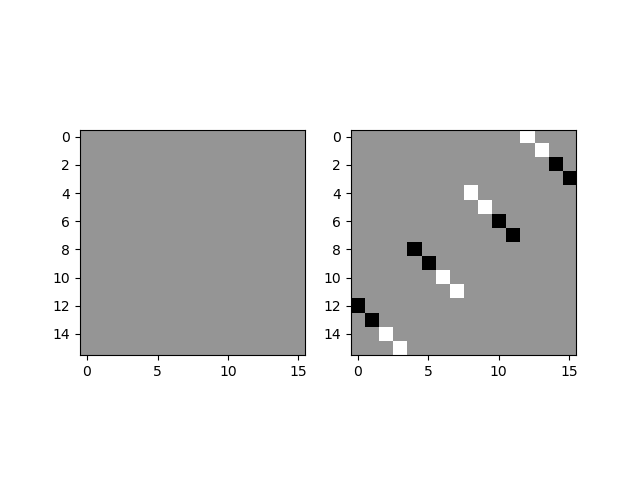

In [5]:
def rolling_kron(stack):
    assert len(stack.shape) == 3
    stack_height = stack.shape[0]
    result = stack[0]
    for layer_idx in range(1, stack_height):
        result = np.kron(stack[layer_idx], result)

    return result

def plot_complex(x):
    assert len(x.shape) == 2
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(x.real / np.abs(x).max(), cmap='Greys', vmin=-1, vmax=1)
    axes[1].imshow(x.imag / np.abs(x).max(), cmap='Greys', vmin=-1, vmax=1)

    return x.real.max(), x.imag.max()

def plot_batched_complex(x):
    assert len(x.shape) == 3
    
    fig, axes = plt.subplots(x.shape[0], 2)
    for batch_idx in range(x.shape[0]):
        axes[batch_idx, 0].imshow(x[batch_idx].real / np.abs(x[batch_idx]).max(), cmap='Greys', vmin=-1, vmax=1)
        axes[batch_idx, 1].imshow(x[batch_idx].imag / np.abs(x[batch_idx]).max(), cmap='Greys', vmin=-1, vmax=1)


    return None

plot_complex(rolling_kron(CORE_PAULI_STACK))

# Actual decomposition functions

In [6]:
# def pauli_decompose(target: np.ndarray = None,
#                     pauli_indices: np.ndarray = None,
#                     qubit_num: int = None,
#                     method: str = 'fast'):
#     assert target is not None
#     assert pauli_indices is not None
#     assert qubit_num is not None
#     assert method in ('dense', 'sparse', 'fast')

#     if method == 'dense':
#         return dense_pauli_decompose(target=target,
#                                      pauli_indices=pauli_indices,
#                                      qubit_num=qubit_num)
        
#     elif method == 'sparse':
#         raise NotImplementedError
        
#     elif method == 'fast':
#         fast_pauli_decompose(target=target,
#                              pauli_indices=pauli_indices,
#                              qubit_num=qubit_num)
#     else:
#         raise ValueError(f'Wrong method: {method}')

# Applying the functions

In [75]:
qubit_num = 3
pauli_indices = np.arange(2**(2 * qubit_num))
pauli_lists = pauli_idx2pauli_list(pauli_indices, qubit_num=qubit_num)
#pauli_stacks = BASE_PAULI_STACK[pauli_lists]
#pauli_matrices = batched_rolling_kron(pauli_stacks)

In [76]:
# #target = np.random.normal(size=(2**qubit_num, 2**qubit_num)) + 1j * np.random.normal(size=(2**qubit_num, 2**qubit_num))
# coeffs = slow_dense_decompose(target=target,
#                                pauli_indices=pauli_indices, 
#                                qubit_num=qubit_num)
# # new_target = np.einsum('b,bij->ij', coeffs, pauli_matrices)
# # print(np.allclose(new_target, target))

In [77]:
start_time = time.time()
#target = np.random.normal(size=(2**qubit_num, 2**qubit_num)) + 1j * np.random.normal(size=(2**qubit_num, 2**qubit_num))
target = np.arange(4**qubit_num).astype(np.complex128).reshape((2**qubit_num, 2**qubit_num))
fast_coeffs = fast_dense_decompose(target=target,
                                   pauli_indices=pauli_indices, 
                                    qubit_num=qubit_num)
print(f'Time elapsed: {time.time() - start_time}')
# fast_target = np.einsum('b,bij->ij', fast_coeffs, pauli_matrices)
# print(np.allclose(fast_target, target))

Time elapsed: 0.0007739067077636719


In [79]:
target

array([[ 0.+0.j,  1.+0.j,  2.+0.j,  3.+0.j,  4.+0.j,  5.+0.j,  6.+0.j,
         7.+0.j],
       [ 8.+0.j,  9.+0.j, 10.+0.j, 11.+0.j, 12.+0.j, 13.+0.j, 14.+0.j,
        15.+0.j],
       [16.+0.j, 17.+0.j, 18.+0.j, 19.+0.j, 20.+0.j, 21.+0.j, 22.+0.j,
        23.+0.j],
       [24.+0.j, 25.+0.j, 26.+0.j, 27.+0.j, 28.+0.j, 29.+0.j, 30.+0.j,
        31.+0.j],
       [32.+0.j, 33.+0.j, 34.+0.j, 35.+0.j, 36.+0.j, 37.+0.j, 38.+0.j,
        39.+0.j],
       [40.+0.j, 41.+0.j, 42.+0.j, 43.+0.j, 44.+0.j, 45.+0.j, 46.+0.j,
        47.+0.j],
       [48.+0.j, 49.+0.j, 50.+0.j, 51.+0.j, 52.+0.j, 53.+0.j, 54.+0.j,
        55.+0.j],
       [56.+0.j, 57.+0.j, 58.+0.j, 59.+0.j, 60.+0.j, 61.+0.j, 62.+0.j,
        63.+0.j]])

In [105]:
pauli_stack = CORE_PAULI_STACK[pauli_idx2pauli_list(pauli_indices[2:3], qubit_num=qubit_num)]

In [106]:
pauli_matrix = batched_rolling_kron(pauli_stack)

In [107]:
pauli_vec = pauli_matrix.reshape((-1, 1))

In [108]:
np.allclose(pauli_vec, np.fft.fft(pauli_vec))

True

In [109]:
np.fft.fft(pauli_vec)

array([[ 1.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 1.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [-1.+0.j],
       [-0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [-0.+0.j],
       [-0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [-0.+0.j],
       [-1.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [-0.+0.j],
       [-0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 1.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 1.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [-0.+0.j],
       [-0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       [-1.+0.j],
       [-0

In [93]:
start_time = time.time()
coeffs = matrix_to_pauli_terms_fast(target)
print(f'Time elapsed: {time.time() - start_time}')

(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
[[ 0.+0.j  1.+0.j  2.+0.j  3.+0.j  4.+0.j  5.+0.j  6.+0.j  7.+0.j]
 [ 9.+0.j  8.+0.j 11.+0.j 10.+0.j 13.+0.j 12.+0.j 15.+0.j 14.+0.j]
 [18.+0.j 19.+0.j 16.+0.j 17.+0.j 22.+0.j 23.+0.j 20.+0.j 21.+0.j]
 [27.+0.j 26.+0.j 25.+0.j 24.+0.j 31.+0.j 30.+0.j 29.+0.j 28.+0.j]
 [36.+0.j 37.+0.j 38.+0.j 39.+0.j 32.+0.j 33.+0.j 34.+0.j 35.+0.j]
 [45.+0.j 44.+0.j 47.+0.j 46.+0.j 41.+0.j 40.+0.j 43.+0.j 42.+0.j]
 [54.+0.j 55.+0.j 52.+0.j 53.+0.j 50.+0.j 51.+0.j 48.+0.j 49.+0.j]
 [63.+0.j 62.+0.j 61.+0.j 60.+0.j 59.+0.j 58.+0.j 57.+0.j 56.+0.j]]
(0, slice(None, None, None), slice(None, None, None), slice(None, None, None), slice(None, None, None), slice(None, None, None))
(1, slice(None, None, None), slice(None, None, None), slice(None, None, None), slice(None, None, None), slice(None, None, None))
(2, 2, 2, 2, 2)
(2, 2, 2, 2)

(slice(None, None, None), 0, slice(None, None, None), slice(None, None, None), slice(None, None, None), slice(None, None, None))
(slice(None

In [92]:
import itertools
from typing import Dict
def matrix_to_pauli_terms_fast(matrix: np.ndarray) -> Dict[str, complex]:
    w, h = matrix.shape
    n = w.bit_length() - 1
    N = 2**n
    assert w == h == N  # check matrix is square with power of 2 size

    # Permute by xoring row coordinate into column coordinate
    term_matrix = np.empty(shape=matrix.shape, dtype=np.complex64)
    term_matrix[0, :] = matrix[0, :]
    indices = np.array(range(N))
    for k in range(1, N):
        indices ^= k ^ (k - 1)
        print(term_matrix[k, :].shape)
        term_matrix[k, :] = matrix[k, indices]
    print(term_matrix)

    # Hadamard transform the columns and account for scalar phase from Y.
    term_matrix.shape = (2,) * (2 * n)
    for k in range(n):
        index: List[Union[slice, int]] = [slice(None)] * (2 * n)
        index[k] = 0
        a = tuple(index)
        print(a)
        index[k] = 1
        b = tuple(index)
        print(b)
        print(term_matrix[a].shape)
        # Inplace hadamard transform.
        term_matrix[a] += term_matrix[b]
        term_matrix[b] *= -2
        term_matrix[b] += term_matrix[a]
        # Scalar phase from Y.
        index[k + n] = 1
        term_matrix[tuple(index)] *= 1j
        print(term_matrix[tuple(index)].shape)
        print()
    term_matrix /= 2**n
    term_matrix.shape = (N, N)

    # Convert from dense matrix representation to sparse dict representation.
    terms: Dict[str, complex] = {}
    for pauli_tuple in itertools.product("IXYZ", repeat=n):
        pauli_string = ''.join(pauli_tuple)
        xk = sum(2 **k * (pauli_string[n-k-1] in 'XY') for k in range(n))
        zk = sum(2 **k * (pauli_string[n-k-1] in 'YZ') for k in range(n))
        coefficient = term_matrix[zk, xk]
        if coefficient:
            terms[pauli_string] = coefficient
    if not terms:
        terms["I" * n] = 0

    return terms

In [23]:
coeffs.shape

(65536,)

In [15]:
coeffs.shape

(16384,)

In [16]:
coeffs


array([-0.06601442+0.19009846j, -0.12558234+0.07240979j,
       -0.05512112-0.05001769j, ..., -0.01847155-0.13657268j,
        0.16852559+0.14606658j, -0.04153036+0.03492701j])

In [19]:
fast_coeffs

array([-0.06601442+0.19009846j,  0.09268512+0.03297008j,
        0.01759512+0.10319168j, ..., -0.01367718-0.12516351j,
       -0.12544292+0.03335308j,  0.01389151+0.06814129j])

In [9]:
np.allclose(coeffs, fast_coeffs)

True

In [10]:
%timeit slow_dense_decompose(target=target,\
                               pauli_indices=pauli_indices, \
                               qubit_num=qubit_num)

1.82 s ± 47.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
%timeit fast_dense_decompose(target=target,\
                               pauli_indices=pauli_indices, \
                               qubit_num=qubit_num)

1.72 s ± 14.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
%timeit fast_dense_decompose(target=target,\
                               pauli_indices=pauli_indices, \
                               qubit_num=qubit_num)

3.35 s ± 390 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%timeit fast_dense_decompose(target=target,\
                               pauli_indices=pauli_indices, \
                               qubit_num=qubit_num)

2.58 s ± 27.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%timeit fast_dense_decompose(target=target,\
                               pauli_indices=pauli_indices, \
                               qubit_num=qubit_num)

2.3 s ± 23.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
